In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from sklearn import datasets
from sklearn import metrics as m
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from itertools import combinations
from sklearn import datasets
from sklearn import metrics as m
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.svm import SVC
import xgboost as xgb
from thundersvm import SVC as svmgpu
from sklearn.utils import shuffle
import itertools
from sklearn.ensemble import VotingClassifier

<IPython.core.display.Javascript object>

In [3]:
randomseed = 10
np.random.seed(randomseed)

xtest = np.array(pd.read_csv("../dataset/xtest.txt"))
xtrain = np.array(pd.read_csv("../dataset/xtrain.txt"))
ytest_original = np.array(pd.read_csv("../dataset/ytest.txt")).ravel()
ytrain_original = np.array(pd.read_csv("../dataset/ytrain.txt")).ravel()

<IPython.core.display.Javascript object>

In [4]:
ytrain = ytrain_original.copy()
ytest = ytest_original.copy()


clf = []
acc = []
ypredproba_all = []
ypredconfprob_all = []
acc_train = []

<IPython.core.display.Javascript object>

In [5]:
def swapcolumns(trainval, testval, coldindexval):
    trainval[trainval != coldindexval] = 5
    testval[testval != coldindexval] = 5

    trainval[trainval == coldindexval] = 0
    trainval[trainval == 5] = 1

    testval[testval == coldindexval] = 0
    testval[testval == 5] = 1

    return trainval, testval

<IPython.core.display.Javascript object>

1. Baseline classifiers
==============

In [6]:
# Class 0
# ===========================
ytrain,ytest= swapcolumns(ytrain,ytest,0)
#=================================================

rf=RandomForestClassifier(random_state=randomseed, n_estimators=50)
rf.fit(xtrain,ytrain)
rfpred=rf.predict(xtest)
print(m.accuracy_score(ytest,rfpred)) 

clf.append(rf)
acc.append(m.accuracy_score(ytest,rfpred))
ypredproba_all.append(rf.predict_proba(xtest)) 

confmat=m.confusion_matrix(ytest,rfpred)
confsumh=np.sum(confmat,axis=0)
propconfmat=confmat.copy()
for i in range(propconfmat.shape[0]):
    propconfmat[:,i]= 100*propconfmat[:,i]/confsumh[i] 
ypredconfprob_all.append(propconfmat/100)


0.81


<IPython.core.display.Javascript object>

In [7]:
# =================================================
# classs 1
# =================================================
ytrain = ytrain_original.copy()
ytest = ytest_original.copy()
ytrain, ytest = swapcolumns(ytrain, ytest, 1)
# =================================================

rf = RandomForestClassifier(random_state=randomseed, n_estimators=50)
rf.fit(xtrain, ytrain)
rfpred = rf.predict(xtest)
print(m.accuracy_score(ytest, rfpred))

clf.append(rf)
acc.append(m.accuracy_score(ytest, rfpred))
ypredproba_all.append(rf.predict_proba(xtest))

confmat = m.confusion_matrix(ytest, rfpred)
confsumh = np.sum(confmat, axis=0)
propconfmat = confmat.copy()
for i in range(propconfmat.shape[0]):
    propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
ypredconfprob_all.append(propconfmat / 100)

0.7083333333333334


<IPython.core.display.Javascript object>

In [8]:

#=================================================
# classs 2
#=================================================

ytrain=ytrain_original.copy()
ytest=ytest_original.copy()
ytrain,ytest= swapcolumns(ytrain,ytest,2)

#=================================================

rf=RandomForestClassifier(random_state=randomseed, n_estimators=50)
rf.fit(xtrain,ytrain)
rfpred=rf.predict(xtest)
print(m.accuracy_score(ytest,rfpred))

clf.append(rf)
acc.append(m.accuracy_score(ytest,rfpred))
ypredproba_all.append(rf.predict_proba(xtest))

confmat=m.confusion_matrix(ytest,rfpred)
confsumh=np.sum(confmat,axis=0)
propconfmat=confmat.copy()
for i in range(propconfmat.shape[0]):
    propconfmat[:,i]= 100*propconfmat[:,i]/confsumh[i] 
ypredconfprob_all.append(propconfmat/100)


0.8883333333333333


<IPython.core.display.Javascript object>

In [9]:
np.array(ypredconfprob_all).shape

(3, 2, 2)

<IPython.core.display.Javascript object>

3. Confusion matrix based ensemble method
=====

In [10]:
# ci0=ci1=ci2=1

# p_k1_c0=ci0*(ypredproba_all[0][:,0] * ypredconfprob_all[0][0][0] + 
#               ypredproba_all[0][:,1] * ypredconfprob_all[0][0][1] ) 

# p_k1_c1=ci0*(ypredproba_all[0][:,0] * ypredconfprob_all[0][1][0]   + 
#               ypredproba_all[0][:,1] * ypredconfprob_all[0][1][1] )   
 


# p_k2_c0=ci0*(ypredproba_all[1][:,0] * ypredconfprob_all[1][0][0] + 
#               ypredproba_all[1][:,1] * ypredconfprob_all[1][0][1] ) 

# p_k2_c1=ci0*(ypredproba_all[1][:,0] * ypredconfprob_all[1][1][0]   + 
#               ypredproba_all[1][:,1] * ypredconfprob_all[1][1][1] )    
    

# p_k3_c0=ci0*(ypredproba_all[2][:,0] * ypredconfprob_all[2][0][0] + 
#               ypredproba_all[2][:,1] * ypredconfprob_all[2][0][1] ) 

# p_k3_c1=ci0*(ypredproba_all[2][:,0] * ypredconfprob_all[2][1][0]   + 
#               ypredproba_all[2][:,1] * ypredconfprob_all[2][1][1]  )     
 


<IPython.core.display.Javascript object>

In [18]:
# modified version to include the negative prob

ci0 = ci1 = ci2 = 1

ci0 = np.sum(abs(ypredproba_all[0][:, 0] - 0.5)) / ypredproba_all[0][:, 0].shape[0]
ci1 = np.sum(abs(ypredproba_all[1][:, 0] - 0.5)) / ypredproba_all[1][:, 0].shape[0]
ci2 = np.sum(abs(ypredproba_all[2][:, 0] - 0.5)) / ypredproba_all[2][:, 0].shape[0]


p_k1_c1 = ci0 * (
    ypredproba_all[0][:, 0] * ypredconfprob_all[0][1][0]
    + ypredproba_all[0][:, 1] * ypredconfprob_all[0][1][1]
)


p_k2_c1 = ci0 * (
    ypredproba_all[1][:, 0] * ypredconfprob_all[1][1][0]
    + ypredproba_all[1][:, 1] * ypredconfprob_all[1][1][1]
)

p_k3_c1 = ci0 * (
    ypredproba_all[2][:, 0] * ypredconfprob_all[2][1][0]
    + ypredproba_all[2][:, 1] * ypredconfprob_all[2][1][1]
)


p_k1_c0 = ci0 * (
    ypredproba_all[0][:, 0] * ypredconfprob_all[0][0][0]
    + ypredproba_all[0][:, 1] * ypredconfprob_all[0][0][1]
)  # + (p_k2_c1 * p_k3_c1)


p_k2_c0 = ci0 * (
    ypredproba_all[1][:, 0] * ypredconfprob_all[1][0][0]
    + ypredproba_all[1][:, 1] * ypredconfprob_all[1][0][1]
)  # + (p_k1_c1 * p_k3_c1)

p_k3_c0 = ci0 * (
    ypredproba_all[2][:, 0] * ypredconfprob_all[2][0][0]
    + ypredproba_all[2][:, 1] * ypredconfprob_all[2][0][1]
)  # + (p_k2_c1 * p_k1_c1)

<IPython.core.display.Javascript object>

In [19]:
finalcol = np.zeros((ytest.shape[0], 3))
finalcol[:, 0] = p_k1_c0
finalcol[:, 1] = p_k2_c0
finalcol[:, 2] = p_k3_c0
finalpred = np.argmax(finalcol, axis=1)

ytest = ytest_original.copy()
print(m.accuracy_score(ytest, finalpred))
print(m.confusion_matrix(ytest, finalpred))

0.71
[[155  44   1]
 [ 72 114  14]
 [  4  39 157]]


<IPython.core.display.Javascript object>

In [17]:
print(m.confusion_matrix(ytest, finalpred))

[[155  44   1]
 [ 72 114  14]
 [  4  39 157]]


<IPython.core.display.Javascript object>

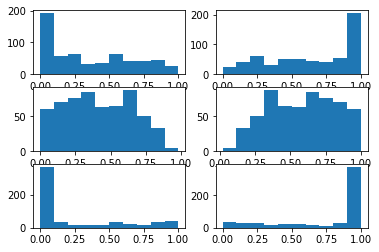

<IPython.core.display.Javascript object>

In [20]:

from matplotlib import pyplot as plt
fig = plt.figure()

plt.subplot(3, 2, 1)
plt.hist(ypredproba_all[0][:,0],bins=10) 
plt.subplot(3, 2, 2)
plt.hist(ypredproba_all[0][:,1],bins=10) 

plt.subplot(3, 2, 3)
plt.hist(ypredproba_all[1][:,0],bins=10) 
plt.subplot(3, 2, 4)
plt.hist(ypredproba_all[1][:,1],bins=10)

plt.subplot(3, 2, 5)
plt.hist(ypredproba_all[2][:,0],bins=10) 
plt.subplot(3, 2, 6)
plt.hist(ypredproba_all[2][:,1],bins=10)


plt.show()
